Final Clusters: [[array([1, 3]), array([2, 1]), array([3, 3])], [array([6, 6]), array([6, 5]), array([4, 6])]]
Final Centroids: [[2.         2.33333333]
 [5.33333333 5.66666667]]


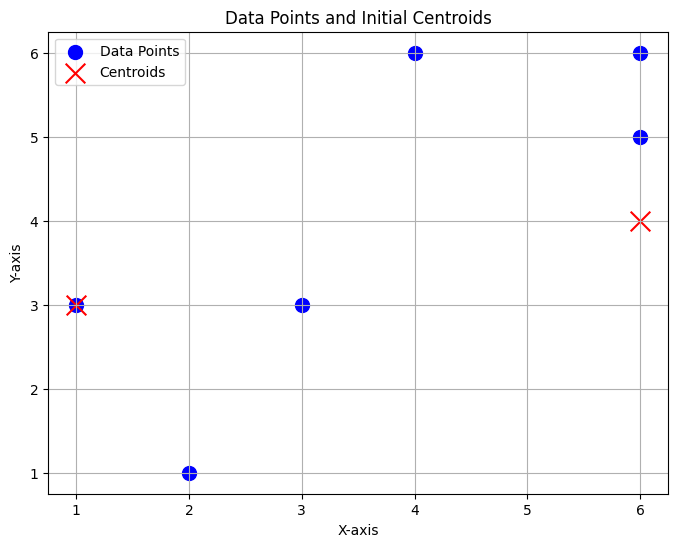

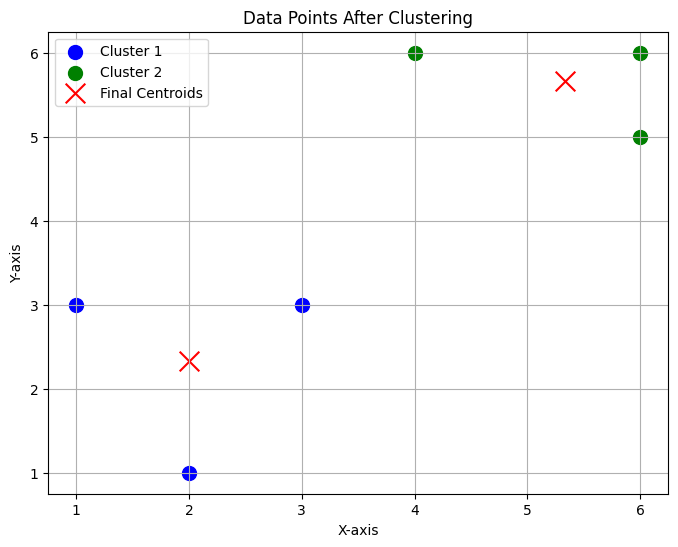

In [79]:
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Quantum distance calculator between vectors 'a' and 'b'
def quantum_dist(a,b):

    if np.all(a==b):

        quantum_distance = 0
        return quantum_distance
    else:

        Z = (np.linalg.norm(a))**2 + (np.linalg.norm(b))**2
        

        # Encoding initial quantum state amplitudes

        phi = [((np.linalg.norm(a))/np.sqrt(Z)),((-np.linalg.norm(b))/np.sqrt(Z))]

        a = a / np.linalg.norm(a)
        b = b / np.linalg.norm(b)
        psi = [a[0]/(np.sqrt(2)), a[1]/(np.sqrt(2)), b[0]/(np.sqrt(2)), b[1]/(np.sqrt(2))]

        # Create a quantum circuit with 4 qubits
        qr1 = QuantumRegister(1)
        qr2 = QuantumRegister(3)
        cr = ClassicalRegister(1)
        qc = QuantumCircuit(qr1,qr2,cr)


        # Step 1: Initialize qubit states
        qc.initialize(phi, qr2[0])
        qc.initialize(psi,qr2[1:3])

        # Step 2: Put the ancilla qubit in superposition with Hadamard operator
        qc.h(qr1)

        # Step 3: Swap test
        qc.cswap(qr1[0],qr2[0],qr2[2])

        # Step 4 Reapply Hadamard operator to ancilla qubit
        qc.h(qr1)

        # Measurement
        qc.measure(qr1,cr)

        sim = AerSimulator()
        compiled_circuit = transpile(qc, sim)
        result = sim.run([compiled_circuit],shots = 10000).result()
        counts = result.get_counts()

        overlap_prob = counts.get('0', 0) / 10000
        overlap_squared = (overlap_prob-0.5)/0.5
        x = max(2 * Z * overlap_squared,0)
        quantum_distance = np.sqrt(x)
        return quantum_distance
    # Initialize data points and centroids
data_points = np.array([[1, 3], [2, 1], [6, 6], [6, 5],[4, 6],[3, 3]])
centroids = np.array([[1, 3], [6, 4]])

# Quantum k-means algorithm based on Lloyd's version of k-means
def quantum_k_means(data, centroids, max_iter=10):
    for i in range(max_iter):
        clusters = [[] for i in range(len(centroids))]
        
        # Assign points to the nearest centroid
        for point in data:
            distances = [quantum_dist(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(point)
        
        # Update centroids
        new_centroids = []
        for cluster in clusters:
            if cluster:
                new_centroids.append(np.mean(cluster, axis=0))
            else:  # Handle empty clusters
                new_centroids.append(np.random.choice(data, size=1)[0])
        
        # Check for convergence
        if np.allclose(new_centroids, centroids):
            break
        centroids = np.array(new_centroids)
    
    return clusters, centroids

# Run the algorithm
clusters, final_centroids = quantum_k_means(data_points, centroids)
print("Final Clusters:", clusters)
print("Final Centroids:", final_centroids)

data_points = np.array([[1, 3], [2, 1], [6, 6], [6, 5],[4, 6],[3, 3]])
centroids = np.array([[1, 3], [6, 4]])

# Plotting before k-means
plt.figure(figsize=(8, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', label='Data Points', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', label='Centroids', marker='x', s=200)
plt.title("Data Points and Initial Centroids")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

cluster_1 = np.array(clusters[0])
cluster_2 = np.array(clusters[1])

# Plotting after k-means
plt.figure(figsize=(8, 6))
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], c='blue', label='Cluster 1', s=100)
plt.scatter(cluster_2[:, 0], cluster_2[:, 1], c='green', label='Cluster 2', s=100)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', label='Final Centroids', marker='x', s=200)
plt.title("Data Points After Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()










'1.3.0'